In [1]:
suppressMessages ( library ( dplyr ) )
suppressMessages ( library ( ggplot2 ) )
options(dplyr.summarise.inform = FALSE)

# Lista 1 - IBI5086
Monitor: Lucas Ramalho Anderson

Considere os dados apresentados no Anexo 1 (já conhecidos de vocês!). Há interesse em saber qual é o range de variação dos dados sob o tratamento A e sob o tratamento B. Além disso, há interesse em estimar o valor da verdadeira média da resposta sob o tratamento A (e sob o B).

1. Calcule (à mão) os seguintes intervalos:
    
    <center>${(\bar{Y}_j - 2s_j ; \bar{Y}_j + 2s_j )}$</center>

Qual é a utilidade destes intervalos? Interprete-os. Faça suposições que achar necessárias.


In [2]:
# Leitura da base
anexo1 = read.table ( "C:/Users/55119/Documents/Monitoria/Dados/Anexo1Lista1.txt" , header = T , dec = ',' )
head ( anexo1 , 5 )

,Trat,Resp
,<fct>,<dbl>
1,A,89.7
2,A,81.4
3,A,84.5
4,A,84.8
5,A,87.3


In [3]:
# Media e desvio padrao por tratamento
resume = anexo1 %>% group_by ( Trat ) %>% summarise ( n = n() , media = mean ( Resp ) , dp = sd ( Resp ) )
# Calculo limites do IC
resume %>% mutate ( inf = round ( media - 2*dp , 2 ) , Sup = round ( media + 2*dp , 2 ) )

Trat,n,media,dp,inf,Sup
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
A,10,84.24,2.901800,78.44,90.04
B,10,85.54,3.650327,78.24,92.84


Os intervalos são dados por:

* Tratamento A: (78,44 ; 90,04);
* Tratamento B: (78,24 ; 92,84)

Estes intervalos são úteis para se identificar a dispersão dos dados em relação à média. Se a amostra possuir distribuição normal, espera-se que o intervalo abranja cerca de 95% das observações, permitindo uma comparação descritiva da distribuição da resposta entre os tratamentos (neste caso).

2. Calcule (à mão) os seguintes intervalos:

<center>
$(\bar{Y}_j - \frac{2s_j}{\sqrt{n}} ; \bar{Y}_j + \frac{2s_j}{\sqrt{n}}), j = A,B$ 
<center>
${(\bar{Y}_d - 2s_d ; \bar{Y}_d + 2s_d )}$



Qual é a utilidade de cada um destes intervalos? Interprete-os. Faça suposições que achar necessárias. Com base neste intervalo decida se a média do tratamento B é maior que a de A.


In [4]:
# Primeiro dos intervalos
resume %>% mutate ( inf = media - 2*dp/sqrt(n) , sup = media + 2*dp/sqrt(n) )

Trat,n,media,dp,inf,sup
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
A,10,84.24,2.901800,82.40474,86.07526
B,10,85.54,3.650327,83.23133,87.84867


In [5]:
paste0 ( round (100 * ( 1 - 2 * pt( -2 , 9 ) ) , 0 ) , "%" )

[1] "92%"

In [6]:
# Segundo intervalo
resume2 = anexo1 %>% group_by ( Trat ) %>% summarise ( n = n() , media = mean ( Resp ) , vr = var ( Resp ) )
valoresA = resume2 %>% filter ( Trat == "A" )
valoresB = resume2 %>% filter ( Trat == "B" )

yBarraD = valoresA$media - valoresB$media
dpD = sqrt ( ( valoresA$vr / valoresA$n ) + ( valoresB$vr / valoresB$n ) )

print ( paste0 ( "O segundo intervalo é dado por (" , round ( yBarraD - 2 * dpD , 2 ) , ";" , round ( yBarraD + 2 * dpD , 2 ) , ")" ) )

[1] "O segundo intervalo é dado por (-4.25;1.65)"


In [7]:
paste0 ( round (100 * ( 1 - 2 * pt( -2 , 18 ) ) , 0 ) , "%" )

[1] "94%"

Os intervalos são utilizados para se realizar uma inferência a respeito da média real das populações. No primeiro caso, faz-se uma estivativa com 92% de confiança (supondo-se que os dados sigam uma distribuição normal) a respeito da média de cada um dos tratamentos, de forma individual. O intervalo de confiança para esta média é de $(82,4 ; 86,08)$ para o tratamento A e $(83,23 ; 87,85)$ para o tratamento B.

Já o segundo intervalo se trata do intervalo de confiança de aproximadamente 94% (supondo-se homocedasticidade e normalidade) para a diferença entre as médias populacionais. O intervalo é dado por $(-4,25;1,65)$.

De ambos os intervalos é possível concluir que não há evidências estatísticas para se rejeitar a hipótese de que as médias são iguais.

3. Seja $\mu_d = \mu_A - \mu_B$ a verdadeira diferença entre as médias dos tratamentos A e B. Vamos agora obter o intervalo de confiança bootstrap para $\mu_d$ . Para isso, utilizando os recursos do **aplicativo R**, realize os seguintes passos:


* Calcule $\bar{d} = \bar{Y}_A - \bar{Y}_B$ e $s_D$ , com  $s_{\bar{d}}^2 = \frac{s_A^2}{10} + \frac{s_B^2}{10}$ , dos dados do Anexo 1;

* Obtenha uma amostra bootstrap dos dados, isto é, re-amostre (com reposição) 10 valores de cada tratamento. Calcule $\bar{d}_b$ e $s_{\bar{d}_b}$ da amostra bootstrap e calcule a estatística $t_b = \frac{\bar{d}_{b} - \bar{d}}{s_{\bar{d_b}}}$
 
* Repita o passo anterior um grande número de vezes (ex., 1000 vezes) e obtenha a distribuição bootstrap da estatística $t_b$. Calcule os percentis $t_{b;2,5\%}$  e $t_{b;97,5\%}$ da distribuição bootstrap e construa o intervalo de confiança bootstrap a 95% dado por $(\bar{d}-t_{b;2,5\%}s_{\bar{d}} , \bar{d}+t_{b;97,5\%}s_{\bar{d}})$
 
Com base neste intervalo decida se a média do tratamento B é maior que a de A.


In [8]:
# Passo numero 1
yBarraA = mean ( anexo1[anexo1$Trat == "A" , "Resp"] )
yBarraB = mean ( anexo1[anexo1$Trat == "B" , "Resp"] )
dBarra = yBarraA - yBarraB
varA = var ( anexo1[anexo1$Trat == "A" , "Resp"] )
varB = var ( anexo1[anexo1$Trat == "B" , "Resp"] )
sdDBarra = sqrt ( varA / 10 + varB / 10 )
# Passos numero 2 e 3 (uma possivel forma de fazer)

set.seed ( 123 )
numeroEnsaios = 1000
tamanhoAmostra = 10
tBoot = c ( )
# Amostras por tratamento
for ( i in 1:numeroEnsaios ){
    
    amostraA = sample ( x = anexo1[anexo1$Trat == "A" , "Resp"] , size = tamanhoAmostra , replace = T )
    amostraB = sample ( x = anexo1[anexo1$Trat == "B" , "Resp"] , size = tamanhoAmostra , replace = T )
    
    # Media
    mediaA = mean ( amostraA )
    mediaB = mean ( amostraB )
    mediaD = mediaA - mediaB

    # DP
    varABoot = var ( amostraA )
    varBBoot = var ( amostraB )
    sdDBoot = sqrt ( ( varABoot/10 ) + ( varBBoot/10 ) )

    tBoot = c ( tBoot , ( ( mediaD - dBarra ) / sdDBoot ) )
    
}


In [9]:
t025 = quantile ( tBoot , .025 )[[1]]
t975 = quantile ( tBoot , .975 )[[1]]

In [10]:
# Limites intervalo
limSup = dBarra - (sdDBarra*t025)
limInf = dBarra - (sdDBarra*t975)
print ( paste0 ( "O intervalo de bootstrap é dado por (", round ( limInf , 2 ) , ";" , round ( limSup , 2 ) , ")" ) )

[1] "O intervalo de bootstrap é dado por (-4.25;1.84)"


Abaixo a distribuição da variável $T_b$, em que as linhas vermelhas delimitam os valores $t_{b ; 2,5\%}$ e $t_{b ; 97,5\%}$, e a linha azul demonstra o valor observado sob a hipótese de que $\mu_D = 0$

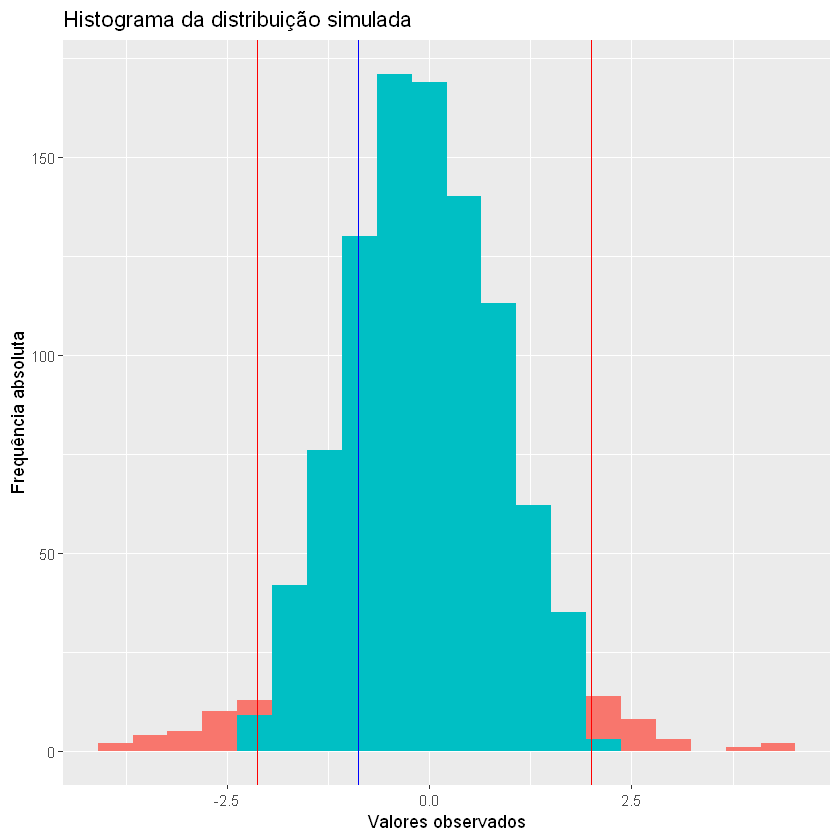

In [11]:
dfTB = as.data.frame ( tBoot )
colnames ( dfTB ) = c ( "vlBootstrap" )
dfTB$dentro = as.factor ( ifelse ( ( dfTB$vlBootstrap >= t025 ) & ( dfTB$vlBootstrap <= t975 ) , 1 , 0 ) )
dfTB %>% ggplot ( ) + 
geom_histogram ( aes ( x = vlBootstrap , fill = dentro ) , bins = 20 ) + 
geom_vline ( xintercept = t025 , col = "red" ) +
geom_vline ( xintercept = t975 , col = "red" ) +
geom_vline ( xintercept = dBarra/sdDBarra , col = "blue" ) + 
labs(x = "Valores observados" , y = "Frequência absoluta" , title = "Histograma da distribuição simulada") +
theme( legend.position = "none" )

Tanto pelo gráfico quanto pelo intervalo, conclui-se que não há evidências para se rejeitar que exista diferença entre os tratamentos.

Considere agora os dados apresentados no Anexo 2 (já conhecidos de vocês!).

4. Há interesse em conhecer o verdadeiro valor da pulsação média ($\mu$) de estudantes em repouso. Com base nos dados do Anexo 2, construa (à mão) um intervalo de confiança para $\mu$ com coeficiente de 95% de confiança. Qual é o comprimento do intervalo? Qual é a margem de erro desse intervalo?

In [12]:
anexo2 = read.table ( "C:/Users/55119/Documents/Monitoria/Dados/Anexo2Lista1.csv" , header = T , sep = ";" )
head ( anexo2 , 5 )

,P1,P2,Ran,Fu,Sex,Altura,Peso,Ativ
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>
1,64,88,1,2,1,66,140,2
2,58,70,1,2,1,72,145,2
3,62,76,1,1,1,"73,5",160,3
4,66,78,1,1,1,73,190,1
5,64,80,1,2,1,69,155,2


In [15]:
# Estatísticas necessárias
resumeDados = anexo2 %>% group_by ( Ran ) %>% summarise ( n = n () , media = mean ( P2 ) , dp = sd ( P2 ) )
# Sob a hipótese de normalidade
calculaValores = resumeDados %>% mutate ( limInf = media - ( qnorm ( 0.975 ) * dp / sqrt ( n ) ) , limSup = media + ( qnorm ( 0.975 ) * dp / sqrt ( n ) ) , margemErro = qnorm ( 0.975 )* dp / sqrt ( n ) , range = 2 * qnorm ( 0.975 )* dp / sqrt ( n ))
calculaValores

Ran,n,media,dp,limInf,limSup,margemErro,range
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,35,92.51429,18.943215,86.23851,98.79007,6.275781,12.551561
2,57,72.31579,9.948363,69.73316,74.89842,2.582631,5.165261


In [16]:
print ( paste0 ( "O intervalo de confiança é dado por (" , round ( calculaValores[calculaValores$Ran == 2,]$limInf , 2) , ";" , round ( calculaValores[calculaValores$Ran == 2,]$limSup , 2 ) , "). O range da estimativa é " , round ( calculaValores[calculaValores$Ran == 2,]$range , 2 ) , " batimentos/s, com margem de erro de " , round ( calculaValores[calculaValores$Ran == 2,]$margemErro , 2 ) , " batimentos/s" ) )

[1] "O intervalo de confiança é dado por (69.73;74.9). O range da estimativa é 5.17 batimentos/s, com margem de erro de 2.58 batimentos/s"


5. Suponha que 100 experimentos independentes sejam realizados e que o verdadeiro valor da pulsação média ($\mu$) de estudantes em repouso seja de 72 batimentos/min. Usando o aplicativo R, explore os recursos da library RcmdrPlugin.TeachingDemos e encontre intervalos de 95% de confiança para $\mu$ em amostras de tamanho 92. Em sua simulação, em quantos experimentos o intervalo obtido incluiu o verdadeiro valor de $\mu$? Em quantos experimentos é esperado que o intervalo inclua o verdadeiro valor de $\mu$?

In [17]:
# Abaixo a simulação de 100 experimentos com o mesmo tamanho amostral
obs = c ( )
n = 92
numExp = 100
mi = 72
sigma = 1.5
set.seed ( 123 )

for ( i in 1 : numExp ){
    
    amostra = rnorm ( n , mean = mi , sd = sigma )
    media =  mean ( amostra ) 
    ep = sd ( amostra )  / sqrt ( n )
    limInf = media - qnorm ( 0.975 ) * ep
    limSup = media + qnorm ( 0.975 ) * ep
    obs = rbind ( obs , c ( limInf , limSup ) )
    
}


obsDf = as.data.frame ( obs )
colnames ( obsDf ) = c ( "limInf" , "limSup" )
obsDf$marca = ifelse ( ( obsDf$limInf <= mi )&( mi <= obsDf$limSup ) , 1 , 0 )
print ( paste0 ( "Temos que " , 100*mean(obsDf$marca) , "% das amostras caíram dentro do intervalo inicial estimado") )

[1] "Temos que 97% das amostras caíram dentro do intervalo inicial estimado"


Era experado que a verdadeira média pertencesse a 95 intervalos de confiança. No caso do experimento, a média ficou em 97 dos 100 intervalos obtidos.

6. Diferentes pesquisadores adotaram os seguintes modelos estatísticos na análise dos dados Pulse.
 
<center>
$M1:P2 = \beta_0 + \beta_1 P1_c + e$; $P1_c = P1-média(P1)$
<center>
$M2: P2 = \beta_0 + \beta_1 Ran + e$
<center>
$M3: P2 = \beta_0 + \beta_1 P1_c + \beta_2 Ran + e$
<center>
$M4: P2 = \beta_0 + \beta_1 P1_c + \beta_2 Ran + \beta_3 (P1_c*Ran) + e$
 
Considerando premissas clássicas (erros independentes, normais, média 0 e variância constante) e usando os recursos do aplicativo R, ajuste os modelos M1, M2, M3 e M4. Apresente razões que poderiam ter levado cada pesquisador a escolher tal modelagem dos dados. Interprete os coeficientes de regressão. Comente os resultados (valores dos resíduos; significância dos coeficientes; coeficiente de determinação (R2); estatística F (H0: $\beta$’s=0 x H1: pelo menos um $\beta$ não nulo). Qual modelo você escolheria? Justifique.

Nota: Veremos no curso, alternativas de ajuste dos modelos M2 e M3 via ANOVA e ANCOVA.

In [18]:
# Calculando valores do envelope para o grafico QQ
simulacoes = 1000
nAmostra = 1000

valoresNorm = matrix ( rnorm ( simulacoes * nAmostra ) , ncol = nAmostra )
ordenaLinhas = t ( apply ( valoresNorm , MARGIN = 1 , sort ) )
ordenaTotValores = apply ( ordenaLinhas , MARGIN = 2 , sort )

valoresInfCalculado = ordenaTotValores [ simulacoes * 0.025 , as.integer ( c ( ( 1:91 )/92 , ( 92 - 0.5 ) / 92 ) * simulacoes ) ]
valoresSupCalculado = ordenaTotValores [ simulacoes * 0.975 , as.integer ( c ( ( 1:91 )/92 , ( 92 - 0.5 ) / 92 ) * simulacoes ) ]

In [19]:
# Criando funcao para gerar grafico QQ
graficoQQ = function ( modelo , valoresInf , valoresSup ) { 
    
    residuosAjust = modelo$residuals / sigma ( modelo )
    numObs = length ( residuosAjust )
    quantisRes = quantile ( residuosAjust , c ( ( 1 : ( numObs - 1) )/numObs , ( numObs - 0.5 ) / numObs ) )
    quantisNorm = qnorm ( c ( ( 1 : ( numObs - 1) )/numObs , ( numObs - 0.5 ) / numObs ) )

    dfQQ = as.data.frame ( cbind ( quantisRes , quantisNorm , valoresInf , valoresSup ) )
    
    print (
    dfQQ %>% ggplot ( ) + 
    geom_point ( aes ( x = quantisNorm , y = quantisRes ) ) +
    geom_line ( aes ( x = quantisNorm , y = valoresInf ) , col = 'red' ) +
    geom_line ( aes ( x = quantisNorm , y = valoresSup ) , col = 'red' ) +
    geom_abline ( intercept = 0 , slope = 1 ) +
    ggtitle ( "Gráfico dos quantis de resíduos ajustados em relação a quantis normais" ) +
    labs ( x = "Quantis normais" , y = "Quantis dos resíduos" )
    )
    
}
# Homocedasticidade
graficoHomo = function ( modelo ) {

    dfHomocedast = as.data.frame ( cbind ( modelo$residuals / sigma ( modelo ) , modelo$fitted.values ) )
    names ( dfHomocedast ) = c ( "Residuo" , "Ajuste" )
    
    print ( 
        
    dfHomocedast  %>% ggplot (  ) + 
    geom_point ( aes ( x = Ajuste , y = Residuo ) ) + 
    geom_hline ( yintercept = 0 , col = "red" ) + 
    ggtitle ( "Gráfico de resíduos ajustados em relação a valores ajustados" ) +
    labs ( x = "Valores ajustados" , y = "Resíduos ajustados" )
        
    )
    
}

# Residuos
graficoResiduos = function ( modelo ) {

    residuosDf = as.data.frame ( modelo$residuals )
    colnames ( residuosDf ) = c ( "residuo" )
    residuosDf$indice = row ( residuosDf )
    
    print (
        
        residuosDf %>% ggplot (  ) + 
        geom_point ( aes ( x = indice , y = residuo ) ) +
        geom_hline ( yintercept = 0 , col = "red" ) +
        ggtitle ( "Gráfico dos resíduos" ) +
        labs ( x = "Índice" , y = "Resíduo" )
        
    )
    
}

# plota tudo
plotaGeral = function ( modelo , valoresInf , valoresSup ){
    
    graficoQQ ( modelo , valoresInf , valoresSup )
    graficoHomo ( modelo )
    graficoResiduos ( modelo )
    
}


In [20]:
# Calcula P1c
anexo2 = anexo2 %>% mutate ( P1c = P1 - mean ( P1 ) )
head ( anexo2 )

,P1,P2,Ran,Fu,Sex,Altura,Peso,Ativ,P1c
,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<dbl>
1,64,88,1,2,1,66,140,2,-8.869565
2,58,70,1,2,1,72,145,2,-14.869565
3,62,76,1,1,1,"73,5",160,3,-10.869565
4,66,78,1,1,1,73,190,1,-6.869565
5,64,80,1,2,1,69,155,2,-8.869565
6,74,84,1,2,1,73,165,1,1.130435


# Modelo 1:

In [21]:
M1 = lm ( P2 ~ P1c , data = anexo2 )
summary ( M1 )


Call:
lm(formula = P2 ~ P1c, data = anexo2)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.477  -8.434  -5.168   4.314  41.178 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  80.0000     1.4114  56.682  < 2e-16 ***
P1c           0.9568     0.1289   7.422 6.22e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.54 on 90 degrees of freedom
Multiple R-squared:  0.3797,	Adjusted R-squared:  0.3728 
F-statistic: 55.09 on 1 and 90 DF,  p-value: 6.218e-11


Temos que o ajuste aos dados observados é dado por:

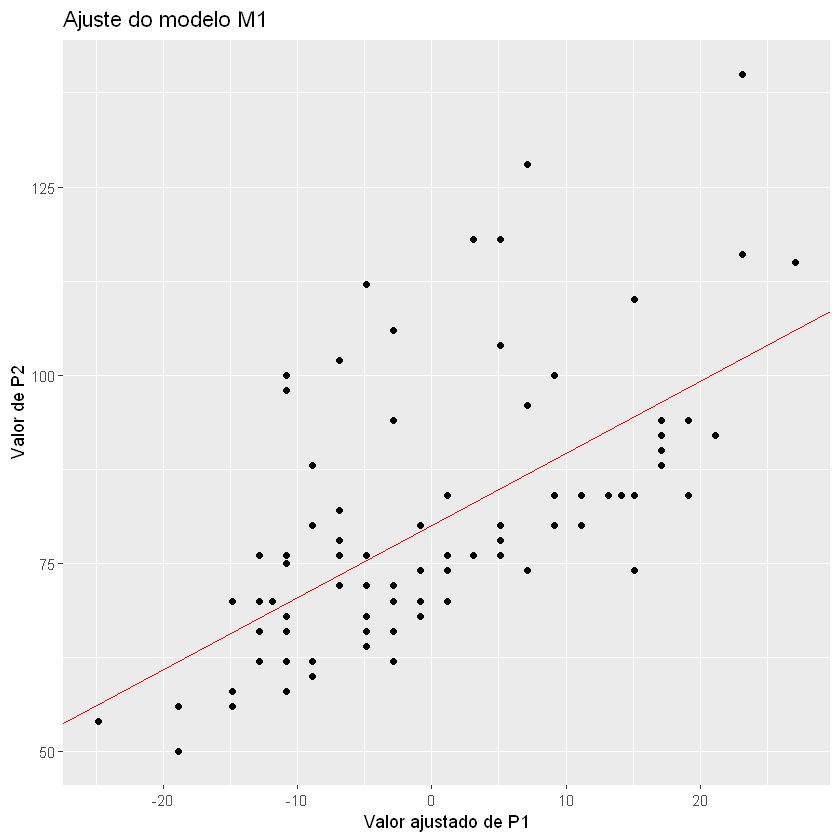

In [22]:
anexo2 %>% ggplot ( ) + 
geom_point ( aes ( x = P1c , y = P2 ) ) +
geom_abline ( intercept = M1$coefficients[1] , slope = M1$coefficients[2] , col = "red" ) +
labs ( x = "Valor ajustado de P1" , y = "Valor de P2" ) +
ggtitle ( "Ajuste do modelo M1" )

Os coeficientes podem ser interpretados por:

* $\beta_0$: Valor esperado de batimentos cardíacos em $t_2$ para o indivíduo que no momento $t_1$ tivesse os batimentos na média.
* $\beta_1$: Acréscimo de batimentos esperado em $t_2$ para cada unidade adicional de batimentos por segundo em $t_1$

O pesquisador pode ter escolhido esta modelagem por imaginar que, independente do tratamento (correr ou ficar parado), os batimentos em $t_2$ dependeriam apenas dos batimentos mensurados em $t_1$.
Do modelo, percebe-se que há significância dos efeitos de $\beta_0$ e $\beta_1$ devido aos valores-p identificados na tabela acima (a probabilidade de se observar estes valores supondo-se que os $\beta$'s sejam nulos é praticamente 0 - valores denotados por $Pr(>|t|)$ na tabela acima). Percebe-se também que o ajuste não é bom, pois temos que $R^2 = 0.3797$.

Abaixo seguem os gráficos residuais:

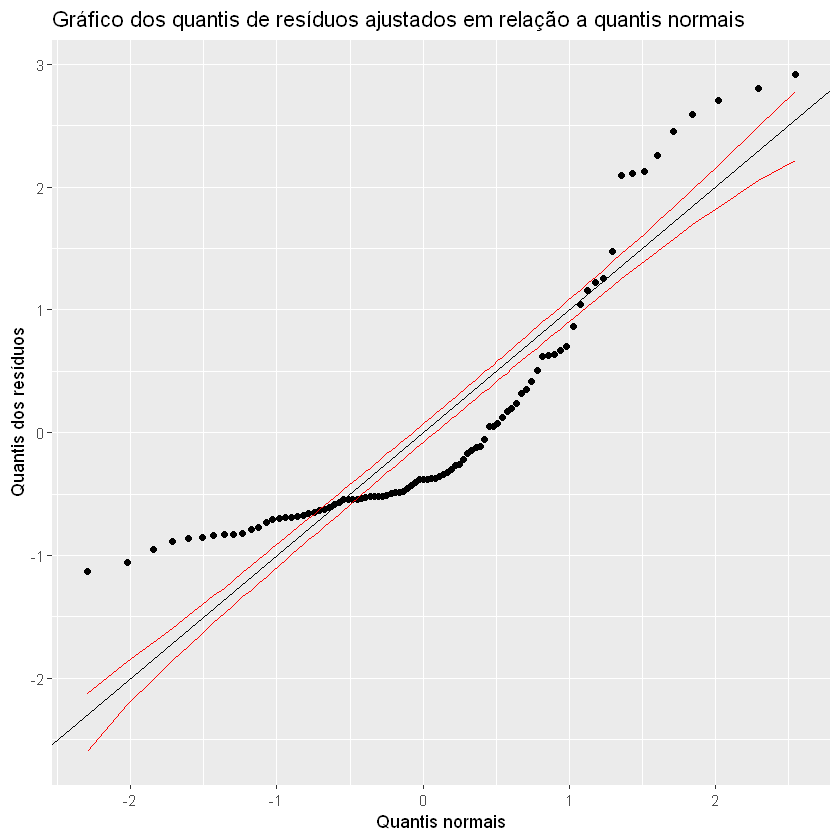

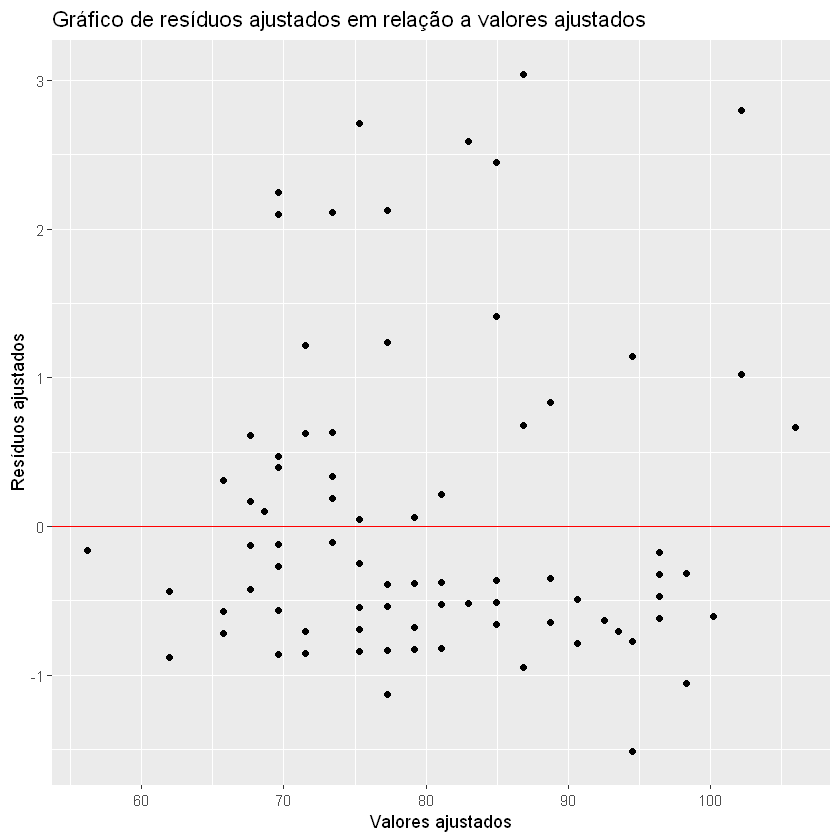

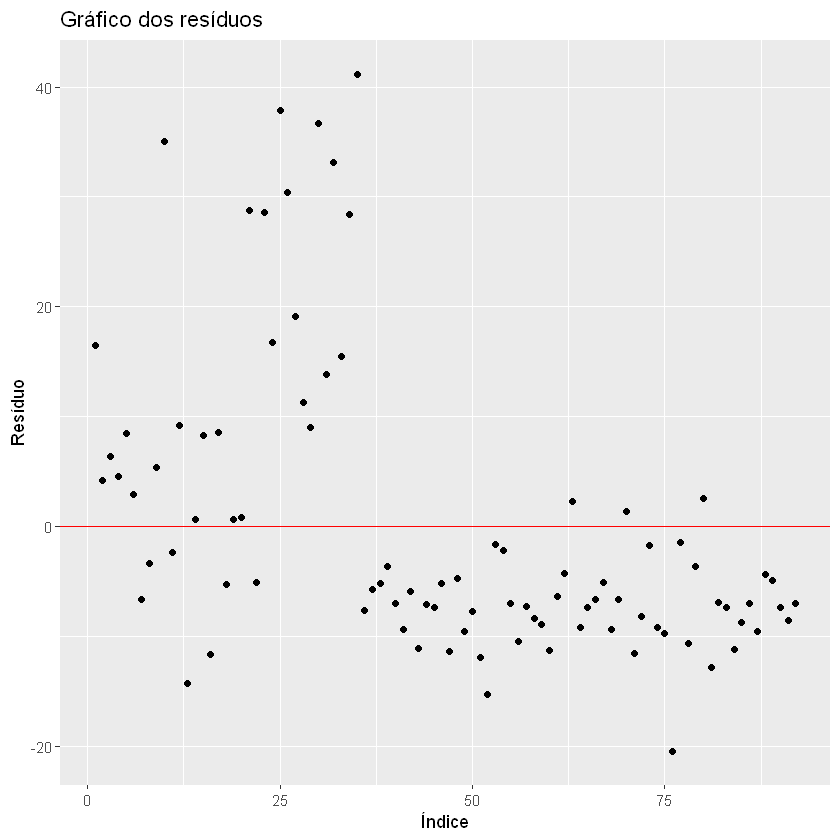

In [23]:
plotaGeral ( M1 , valoresInfCalculado , valoresSupCalculado )

Conclui-se que o modelo é inapropriado, pois as suposições de normalidade, homocedasticidade e independência são violadas (primeiro, segundo e terceiro gráficos, respectivamente).

# Modelo M2

In [24]:
M2 = lm ( P2 ~ as.factor ( Ran ) , data = anexo2 )
summary ( M2 )


Call:
lm(formula = P2 ~ as.factor(Ran), data = anexo2)

Residuals:
    Min      1Q  Median      3Q     Max 
-34.514 -10.316  -2.316   7.684  47.486 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       92.514      2.373  38.981  < 2e-16 ***
as.factor(Ran)2  -20.198      3.015  -6.699 1.77e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.04 on 90 degrees of freedom
Multiple R-squared:  0.3327,	Adjusted R-squared:  0.3253 
F-statistic: 44.88 on 1 and 90 DF,  p-value: 1.768e-09


Temos que o ajuste aos dados observados é dado por:

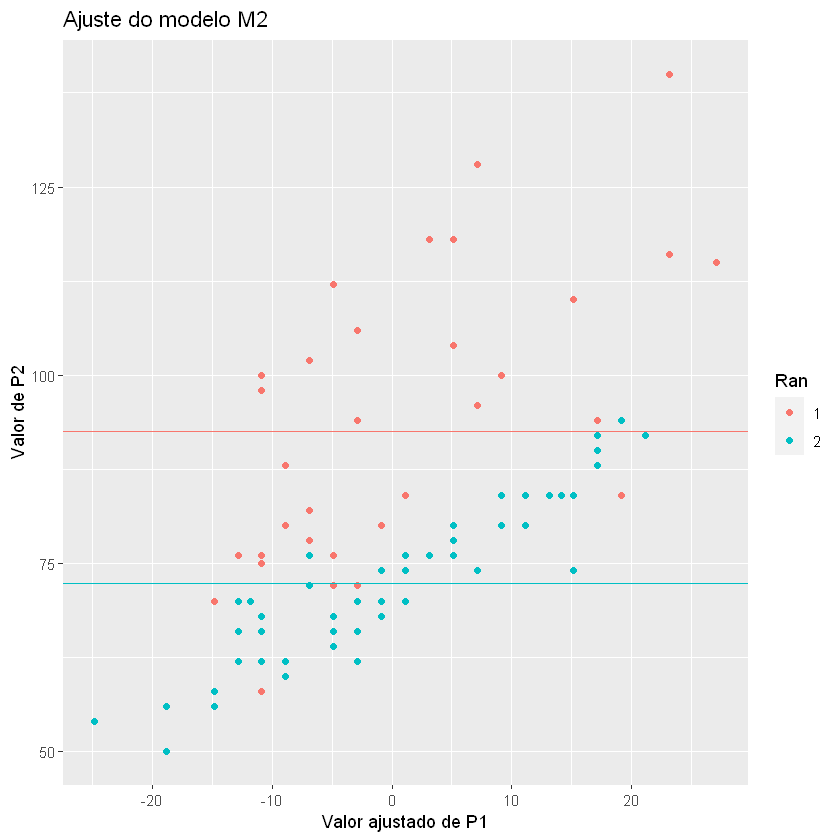

In [25]:
anexo2 %>% ggplot ( ) + 
geom_point ( aes ( x = P1c , y = P2 , col = as.factor ( Ran ) ) ) +
geom_abline ( intercept = M2$coefficients[1] , slope = 0 , col = "#F8766D" ) +
geom_abline ( intercept = M2$coefficients[1] + M2$coefficients[2] , slope = 0 , col = "#00BFC4" ) +
labs ( x = "Valor ajustado de P1" , y = "Valor de P2" , col = "Ran") +
ggtitle ( "Ajuste do modelo M2" )

Os coeficientes podem ser interpretados por:

* $\beta_0$: Valor esperado de batimentos cardíacos em $t_2$ para o indivíduo submetido ao tratamento 1 (correu);
* $\beta_1$: Efeito no valor esperado de batimentos cardíacos em $t_2$ para o indivíduo submetido ao tratamento 2 (ficou parado)

O pesquisador pode ter escolhido esta modelagem por imaginar que, independente do estado inicial, os batimentos em $t_2$ dependeriam apenas do tratamento (correr ou ficar parado).
Do modelo, percebe-se que há significância dos efeitos de $\beta_0$ e $\beta_1$ devido aos valores-p identificados na tabela acima (a probabilidade de se observar estes valores supondo-se que os $\beta$'s sejam nulos é praticamente 0 - valores denotados por $Pr(>|t|)$ na tabela acima). Percebe-se também que o ajuste não está bom, dado que $R^2 = 0.3253$

Abaixo seguem os gráficos residuais:

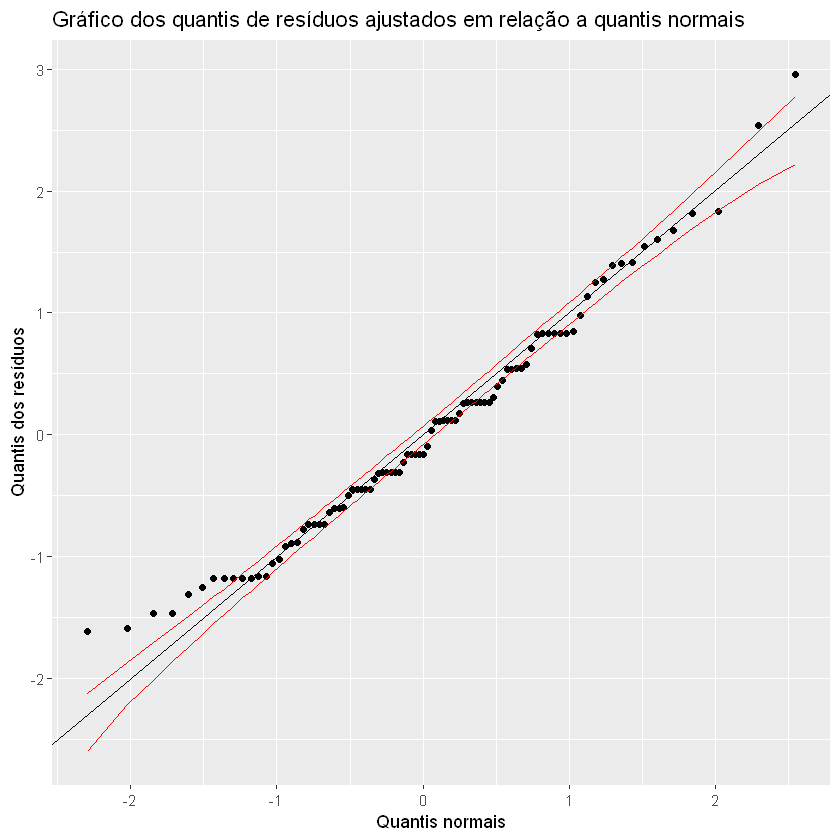

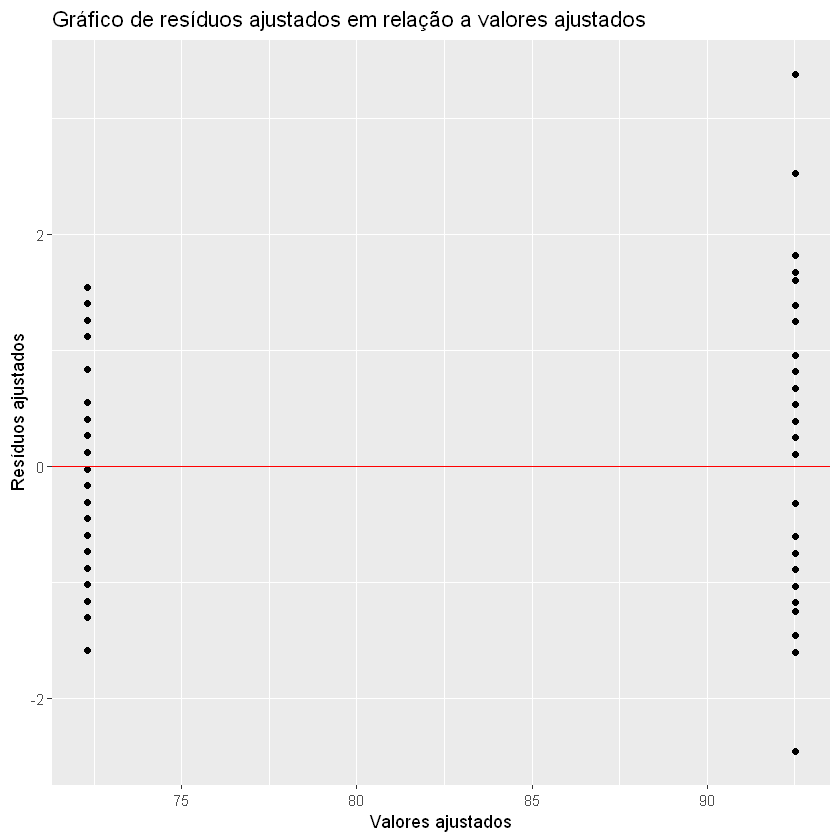

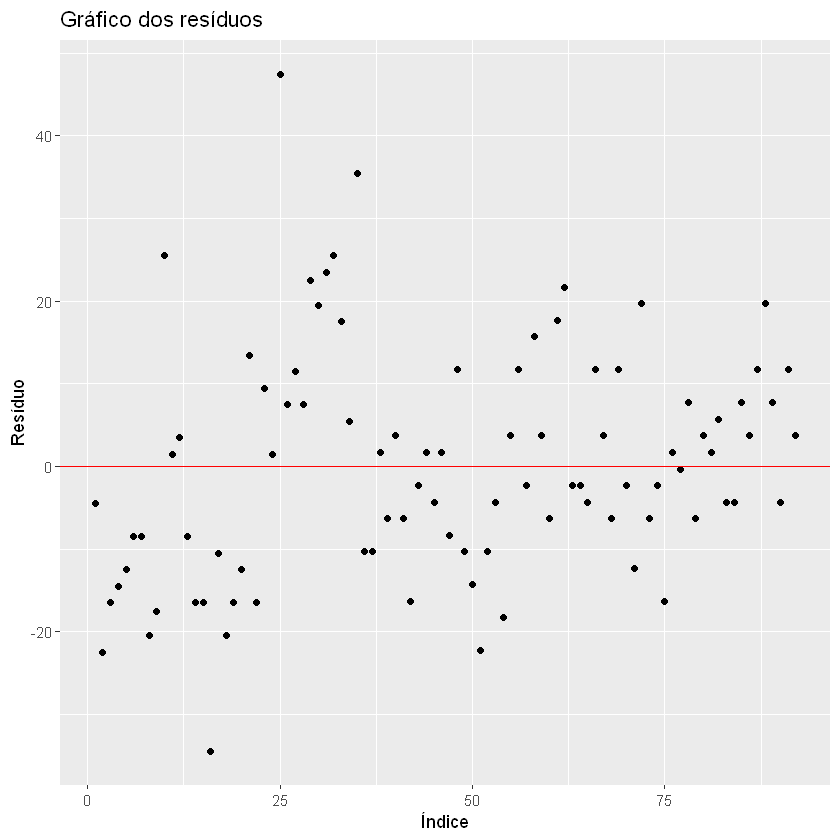

In [26]:
plotaGeral ( M2 , valoresInfCalculado , valoresSupCalculado )

Percebe-se que as premissas de normalidade e homocedasticidade são violadas neste modelo (primeiro e segundo gráficos).

# Modelo M3

In [27]:
M3 = lm ( P2 ~ P1c + as.factor ( Ran )  , data = anexo2 )
summary ( M3 )


Call:
lm(formula = P2 ~ P1c + as.factor(Ran), data = anexo2)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.3037  -3.9749  -0.2817   3.1931  29.6459 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      91.84779    1.66162  55.276  < 2e-16 ***
P1c               0.91247    0.09366   9.743 1.09e-15 ***
as.factor(Ran)2 -19.12274    2.11209  -9.054 2.90e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.822 on 89 degrees of freedom
Multiple R-squared:  0.6771,	Adjusted R-squared:  0.6698 
F-statistic: 93.31 on 2 and 89 DF,  p-value: < 2.2e-16


Temos que o ajuste aos dados observados é dado por:

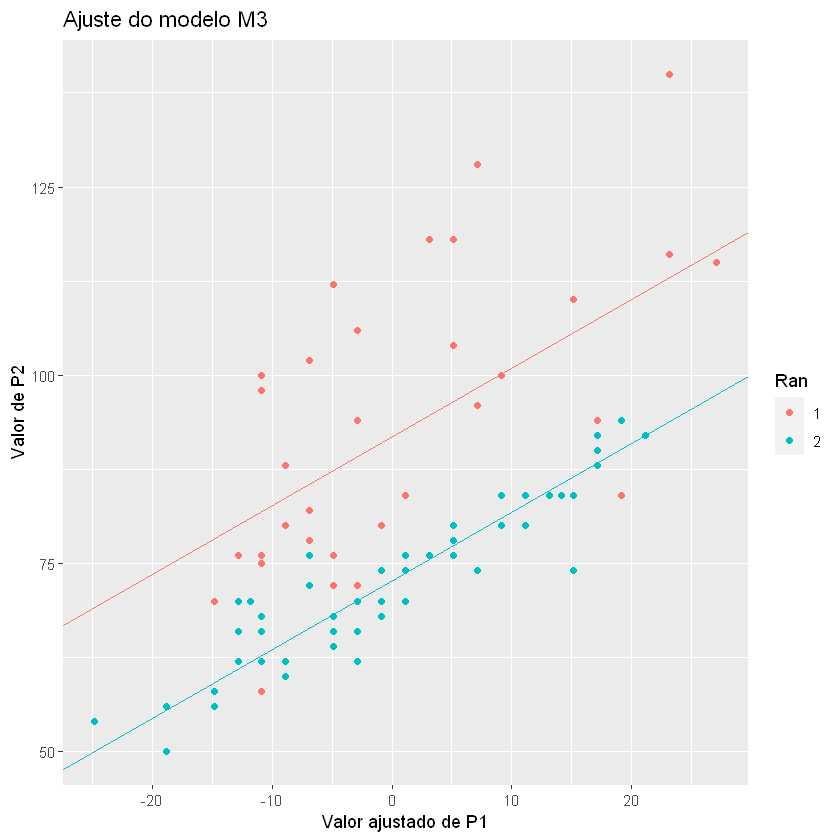

In [28]:
anexo2 %>% ggplot ( ) + 
geom_point ( aes ( x = P1c , y = P2 , col = as.factor ( Ran ) ) ) +
geom_abline ( intercept = M3$coefficients[1] , slope = M3$coefficients[2] , col = "#F8766D" ) +
geom_abline ( intercept = M3$coefficients[1] + M3$coefficients[3] , slope = M3$coefficients[2] , col = "#00BFC4" ) +
labs ( x = "Valor ajustado de P1" , y = "Valor de P2" , col = "Ran") +
ggtitle ( "Ajuste do modelo M3" )

Os coeficientes podem ser interpretados por:

* $\beta_0$: Valor esperado de batimentos cardíacos em $t_2$ para o indivíduo submetido ao tratamento 1 (correu) cujo valor dos batimentos medidos em $t_1$ estava na média;
* $\beta_1$: Efeito da variação no valor esperado de batimentos cardíacos em $t_2$ para cada unidade de batimentos cardíacos que o indivíduo distava em $t_1$ da média
* $\beta_2$: Efeito da variação no valor esperado de batimentos cardíacos em $t_2$ para o indivíduo submetido ao tratamento 2 (ficou parado)

O pesquisador pode ter escolhido esta modelagem por imaginar que, apesar de existir diferença entre os indivíduos que correram e os que ficaram parados, o efeito da pressão medida em $t_1$ seria o mesmo.
Do modelo, percebe-se que há significância dos efeitos de $\beta_0$, $\beta_1$ e $\beta_2$ devido aos valores-p identificados na tabela acima (a probabilidade de se observar estes valores supondo-se que os $\beta$'s sejam nulos é praticamente 0 - valores denotados por $Pr(>|t|)$ na tabela acima). Percebe-se também que o ajuste é muito melhor do que os anteriores, com $R^2 = 0.6698$

Abaixo seguem os gráficos residuais:

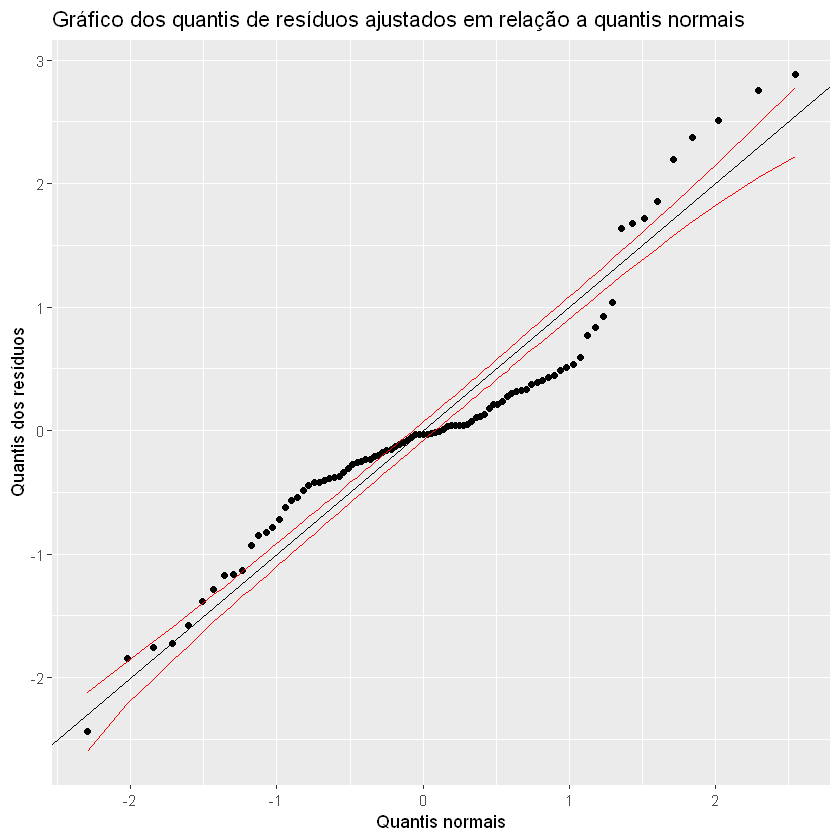

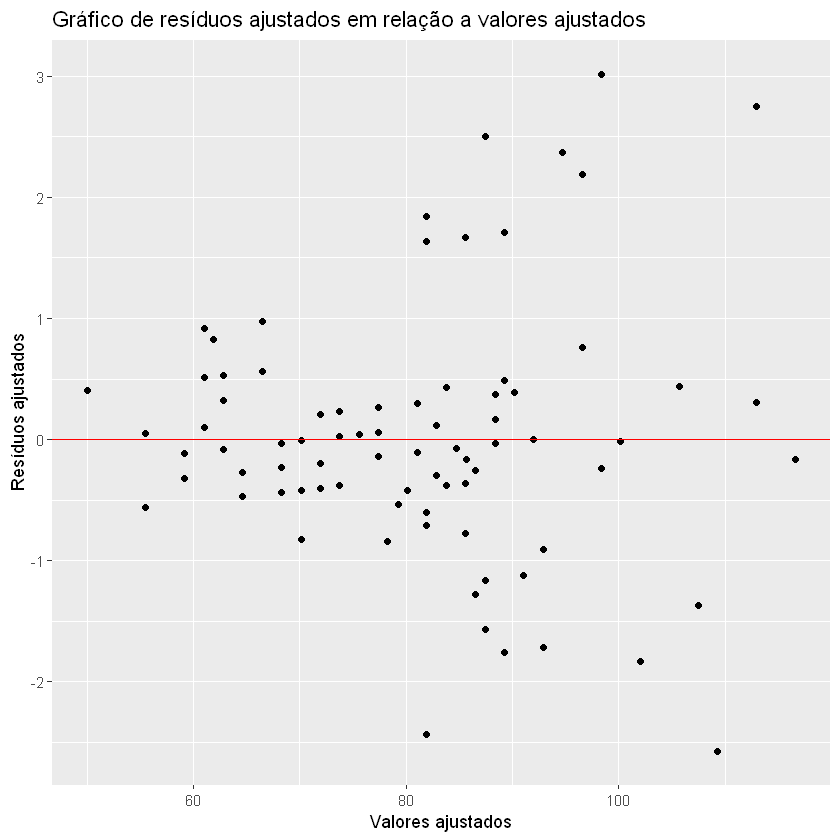

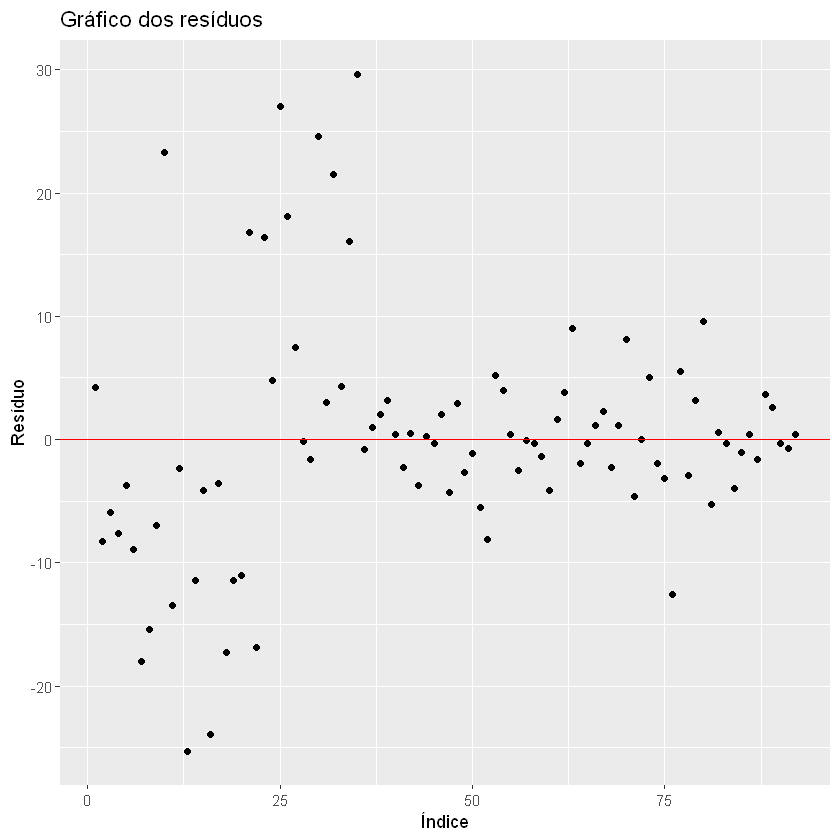

In [29]:
plotaGeral ( M3 , valoresInfCalculado , valoresSupCalculado )

Percebe-se que as premissas de normalidade, homocedasticidade e independência são violadas neste modelo (primeiro, segundo e terceiro gráficos, respectivamente).

# Modelo M4

In [30]:
M4 = lm ( P2 ~ P1c + as.factor ( Ran ) + P1c * as.factor ( Ran ) , data = anexo2 )
summary ( M4 )


Call:
lm(formula = P2 ~ P1c + as.factor(Ran) + P1c * as.factor(Ran), 
    data = anexo2)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.0252  -4.0728  -0.5624   2.8070  29.0471 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          91.7794     1.6667  55.065  < 2e-16 ***
P1c                   1.0060     0.1476   6.817 1.11e-09 ***
as.factor(Ran)2     -19.0829     2.1165  -9.016 3.80e-14 ***
P1c:as.factor(Ran)2  -0.1570     0.1912  -0.821    0.414    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.84 on 88 degrees of freedom
Multiple R-squared:  0.6796,	Adjusted R-squared:  0.6686 
F-statistic: 62.21 on 3 and 88 DF,  p-value: < 2.2e-16


Temos que o ajuste aos dados observados é dado por:

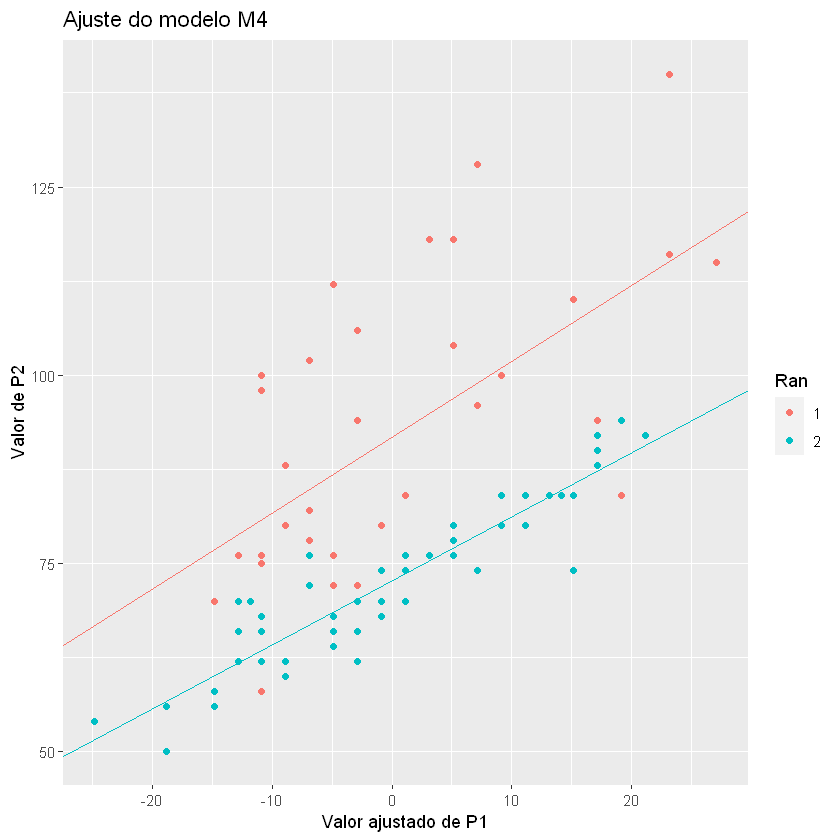

In [31]:
anexo2 %>% ggplot ( ) + 
geom_point ( aes ( x = P1c , y = P2 , col = as.factor ( Ran ) ) ) +
geom_abline ( intercept = M4$coefficients[1] , slope = M4$coefficients[2] , col = "#F8766D" ) +
geom_abline ( intercept = M4$coefficients[1] + M4$coefficients[3] , slope = M4$coefficients[2] + M4$coefficients[4] , col = "#00BFC4" ) +
labs ( x = "Valor ajustado de P1" , y = "Valor de P2" , col = "Ran") +
ggtitle ( "Ajuste do modelo M4" )

Os coeficientes podem ser interpretados por:

* $\beta_0$: Valor esperado de batimentos cardíacos em $t_2$ para o indivíduo submetido ao tratamento 1 (correu) cujo valor dos batimentos medidos em $t_1$ estava na média;
* $\beta_1$: Efeito da variação no valor esperado de batimentos cardíacos em $t_2$ para cada unidade de batimentos cardíacos que o indivíduo distava em $t_1$ da média;
* $\beta_2$: Efeito da variação no valor esperado de batimentos cardíacos em $t_2$ para o indivíduo submetido ao tratamento 2 (ficou parado);
* $\beta_3$: Efeito da variação no valor esperado de batimentos cardíacos em $t_2$ para cada unidade de batimentos cardíacos que o indivíduo submetido ao tratamento 2 (ficou parado) distava em $t_1$ da média;

O pesquisador pode ter escolhido esta modelagem por imaginar que, além da resposta ser influenciada pelo tratamento (correu ou ficou parado) e pela pressão inicial, os indivíduos que foram escolhidos para cada tratamento possuíam à priori diferentes pressões iniciais (no tempo $t_1$. Isto é, por algum motivo os indivíduos não foram aleatorizados.
Do modelo, percebe-se que há significância dos efeitos de $\beta_0$, $\beta_1$ e $\beta_2$ devido aos valores-p identificados na tabela acima (a probabilidade de se observar estes valores supondo-se que os $\beta$'s sejam nulos é praticamente 0 - valores denotados por $Pr(>|t|)$ na tabela acima). Nota-se que para $\beta_3$, não se rejeita a hipótese de que o coeficiente é nulo, isto é, há evidências para se concluir que exista diferença do efeito da pressão inicial entre os grupos. Percebe-se que o ajuste é muito próximo ao modelo $M3$, com $R^2 = 0.6686$

Abaixo seguem os gráficos residuais:

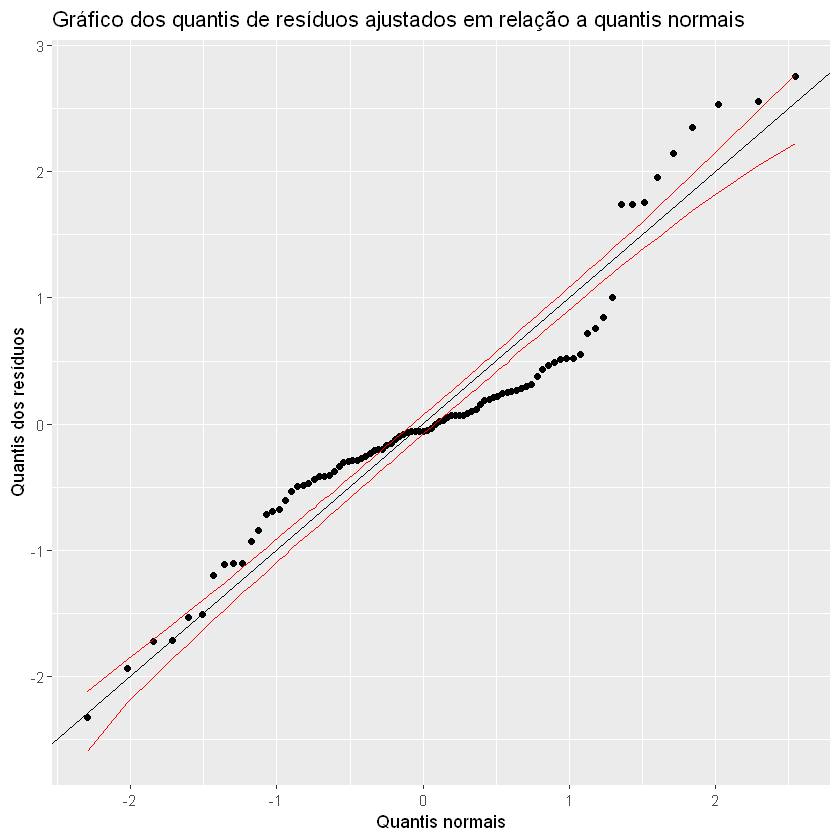

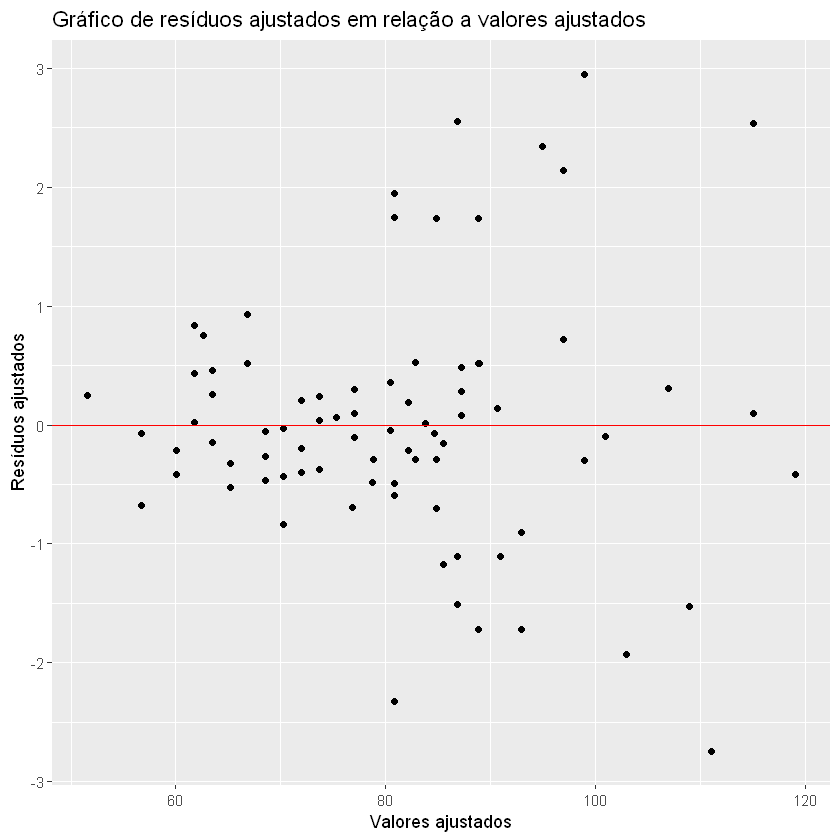

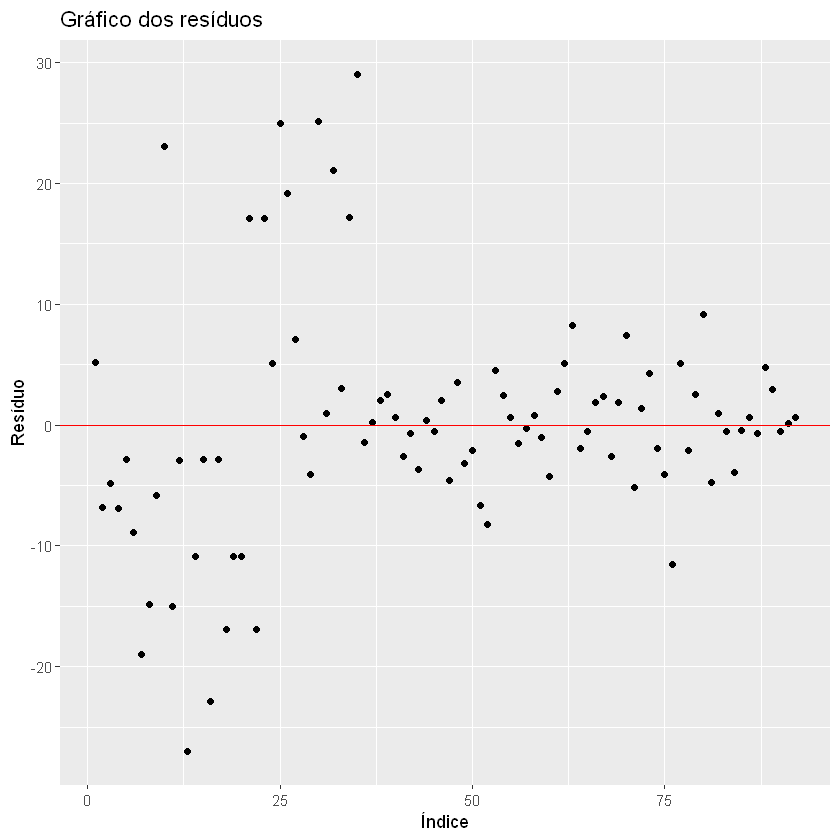

In [32]:
plotaGeral ( M4 , valoresInfCalculado , valoresSupCalculado )

Percebe-se que as premissas de normalidade, homocedasticidade e independência são violadas neste modelo (primeiro, segundo e terceiro gráficos, respectivamente).